## Hydrograph Plot:

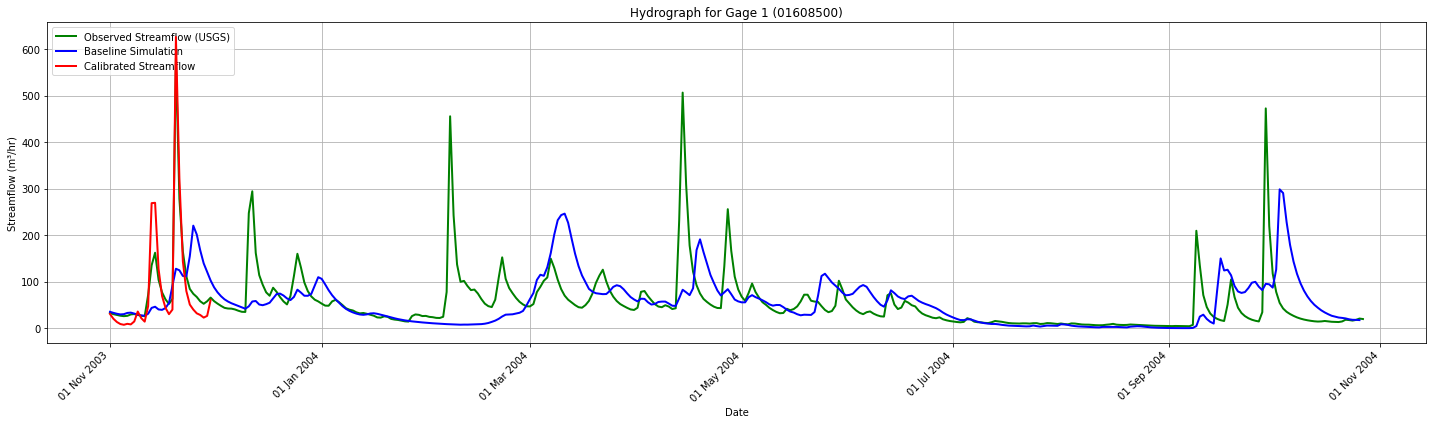

In [10]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Base Directory and Station ID
# ----------------------------------------------------
station_id = "01608500"

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_obs = pd.read_csv("/home/ms6730/SBI_calibration/hydrograph_one_water_year_baseline_observed/observed_streamflow.csv")
df_baseline = pd.read_csv("/home/ms6730/SBI_calibration/hydrograph_one_water_year_baseline_observed/baseline_streamflow.csv")
df_calibrated = pd.read_csv("/home/ms6730/streamflow_one_water_year/sbi_framework/output/sinnemahoning/streamflow_daily_pfsim.csv")
# ----------------------------------------------------
# Convert and Align Date Columns and Drop First 5 Days
# ----------------------------------------------------
dates_obs = pd.to_datetime(df_obs["date"])[5:]
df_obs = df_obs.iloc[5:].reset_index(drop=True)

dates_baseline= pd.to_datetime(df_baseline["date"])[5:]
df_baseline = df_baseline.iloc[5:].reset_index(drop=True)


dates_calibrated= pd.to_datetime(df_calibrated["date"])[5:]
df_calibrated = df_calibrated.iloc[5:].reset_index(drop=True)



# Plot observed streamflow
plt.figure(figsize=(20, 6)) 
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, 
         label='Observed Streamflow (USGS)', zorder=10)
plt.plot(dates_baseline, df_baseline[station_id], color='blue', linewidth=2, 
         label='Baseline Simulation', 
         zorder=10)
plt.plot(dates_calibrated, df_calibrated[station_id], color='red', linewidth=2, 
         label='Calibrated Streamflow ', zorder=10)

# Titles and labels
plt.title(f"Hydrograph for Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_path = "/home/ms6730/SBI_calibration/hydrograph_one_water_year_baseline_observed/hydrograph_baseline_observed_01608500.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
